<a href="https://colab.research.google.com/github/vsrmule/project1/blob/main/orcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#srihari workspace

#**Project Name** - Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

# **Summary:**

I recieved a data frame with following features(columns):


InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

The cx of any retain company falls under different category and sub groups. Those groups can be based on country, time of purchase, types of purchase, total purchase and so on. Segementating them into multiple groups using ML models helps the company for better service, keeping good and old cx happy and targeted advertisment, etc.

I started my project with dropping null values, as there was no good way to replace them. I also stripped date, month, time, etc. in different column for better analysis. I also made a new feature of total cost a cx spend.
Further, I analysed which countries have highest number of cx, months with high orders, products that gets most demand, etc. I also made graph to have a clear visulization.

I also noticed a number of cx cancelled the order, I dropped cx with negative total cost before modelling. The company is ideally suggested to look into why some cx cancelled orders.

I did the RFM modelling, thus analysed the cx on basis of Recency, Frequency, Monetary Value. In the last part I used different ML models to cluster data into different groups. According  to models, following are the ideal number of clusters to be divided.

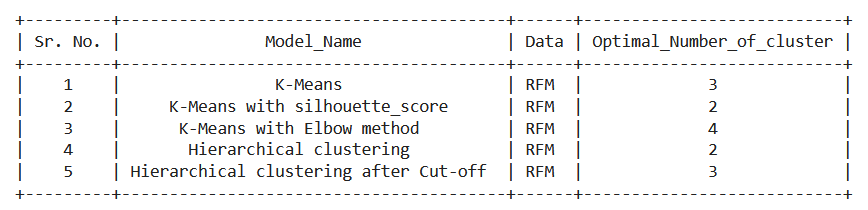

# **GitHub Link -**

https://github.com/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/ML_unsupervised_submission.ipynb

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#Leemoji workspace

##***1. Know Your Data***

###***importing libraries***

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from prettytable import PrettyTable

###***Dataset Loading***

In [123]:
#LOAD DATASET
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/Online Retail Customer Segmantation Dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

###Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


####Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

5268

####Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

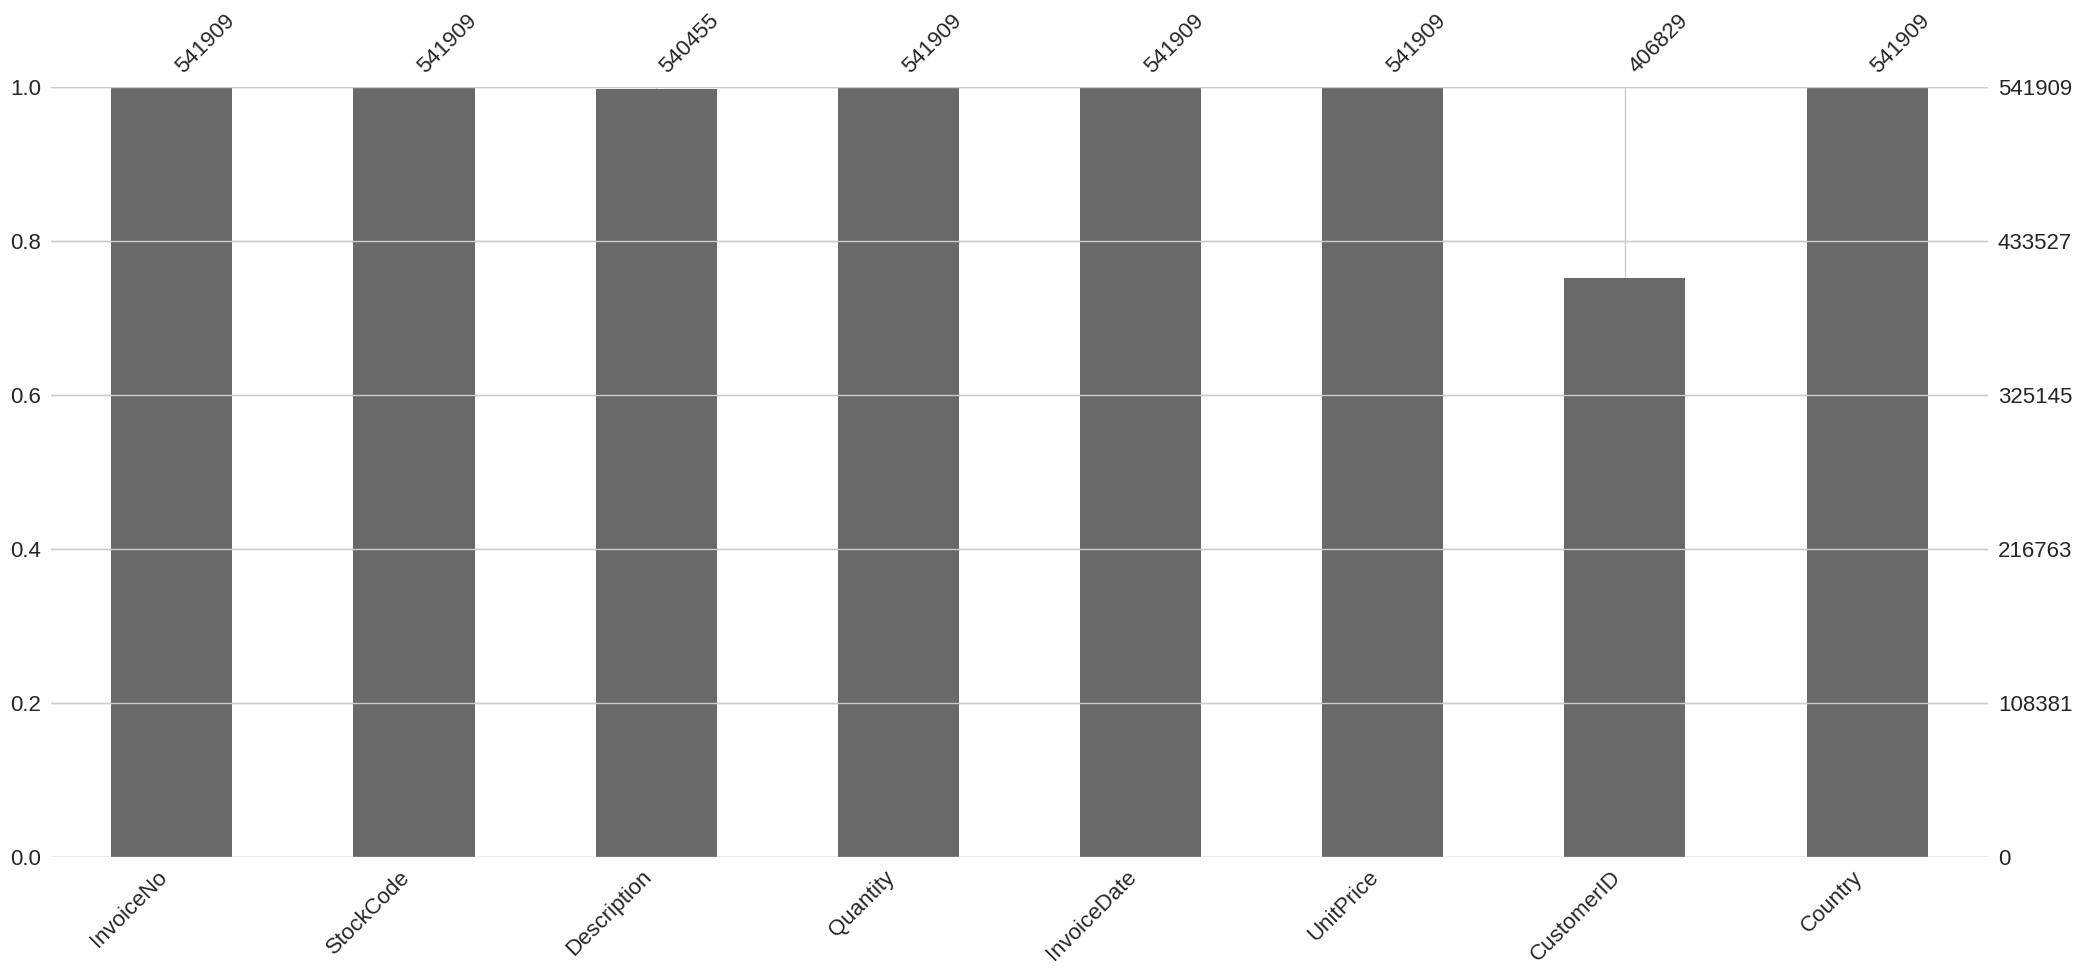

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

###What did you know about your dataset?

The data set contains information of different online customer, including invoice number, stock code, quantity, etc. (details in section below).

Out dataframe have 5268 duplicates, and a number of NAN in 2 columns: discription has 1454 and customer id has 135080 (shown in graph above).

##***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## ***3.Data Wrangling***

source: Internet.

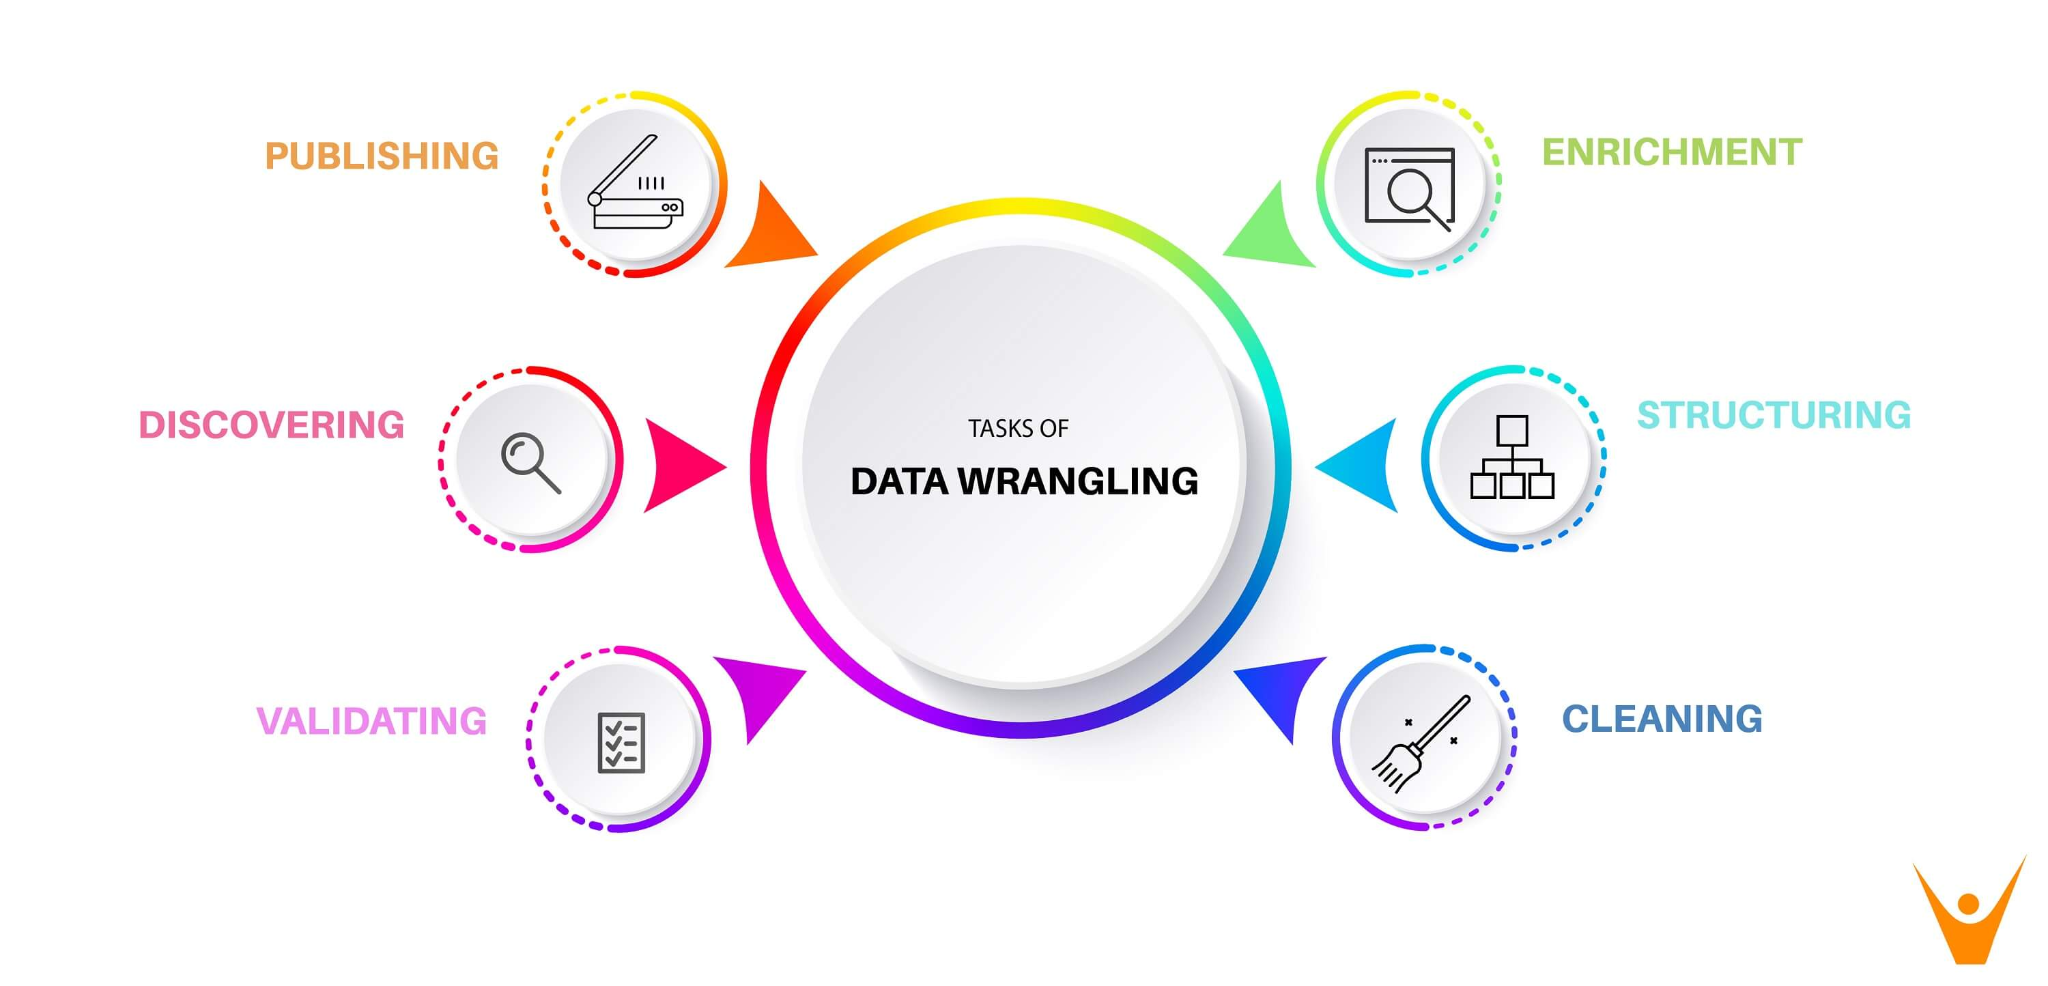

1)Stripping of ***Invoice Date*** into ***year, month, day, hours*** to have a *better analysis of customer*.

2)Adding a ***new column for total amount***. **Total amount = Quantity x Unit price**.

3)**Droping the Missing and Duplicate Values***

### Data Wrangling Code

####1)Stripping of ***Invoice Date*** into ***year, month, day, hours*** to have a *better analysis of customer*.

In [ ]:
#We have a invoice date column, checking data type.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#We already have InvoiceDate as datetime object. I am stripping them into year, month, day, hours to have a better analysis of customer.
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B')
df['Invoice_Day'] = df['InvoiceDate'].dt.strftime('%A')
df['Invoice_Hour'] = df['InvoiceDate'].dt.hour

#Printing data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8


####2)Adding a new column for total amount. Total amount = Quantity x Unit price.

In [124]:
#Adding a new column for total amount. Tital amount = Quantity*Unit price.
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#printing new data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


####3)Droping the Missing and the Duplicate  values

In [ ]:
#Dropping the Missing Values and the Duplicate values
#Dropping Missing Values
df.dropna(axis = 0 , inplace = True)
#Droping the Duplicate Values
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Invoice_Year     0
Invoice_Month    0
Invoice_Day      0
Invoice_Hour     0
Total_Amount     0
dtype: int64

### What all manipulations have you done and insights you found?

I have done 2 manipulation in data frame:

1. Added 4 additional column from datetime feature, that are: Invoice year, Month, day and hour.
2. I have also added one additional column for total amount spend by customer.
Both this new column(feature) will help us better analyze the customer.

# ***Sirisha workspace***

###***Dataset Loading for Sirisha***

In [ ]:
#LOAD DATASET
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/Online Retail Customer Segmantation Dataset.xlsx')

**Distribution of numerical** **data**

**Data** **Vizualization**

Chart-1

Chart-2

**Top** **countries**

In [ ]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries.head(37)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


Text(0.5, 1.0, 'Country vs counts of CX')

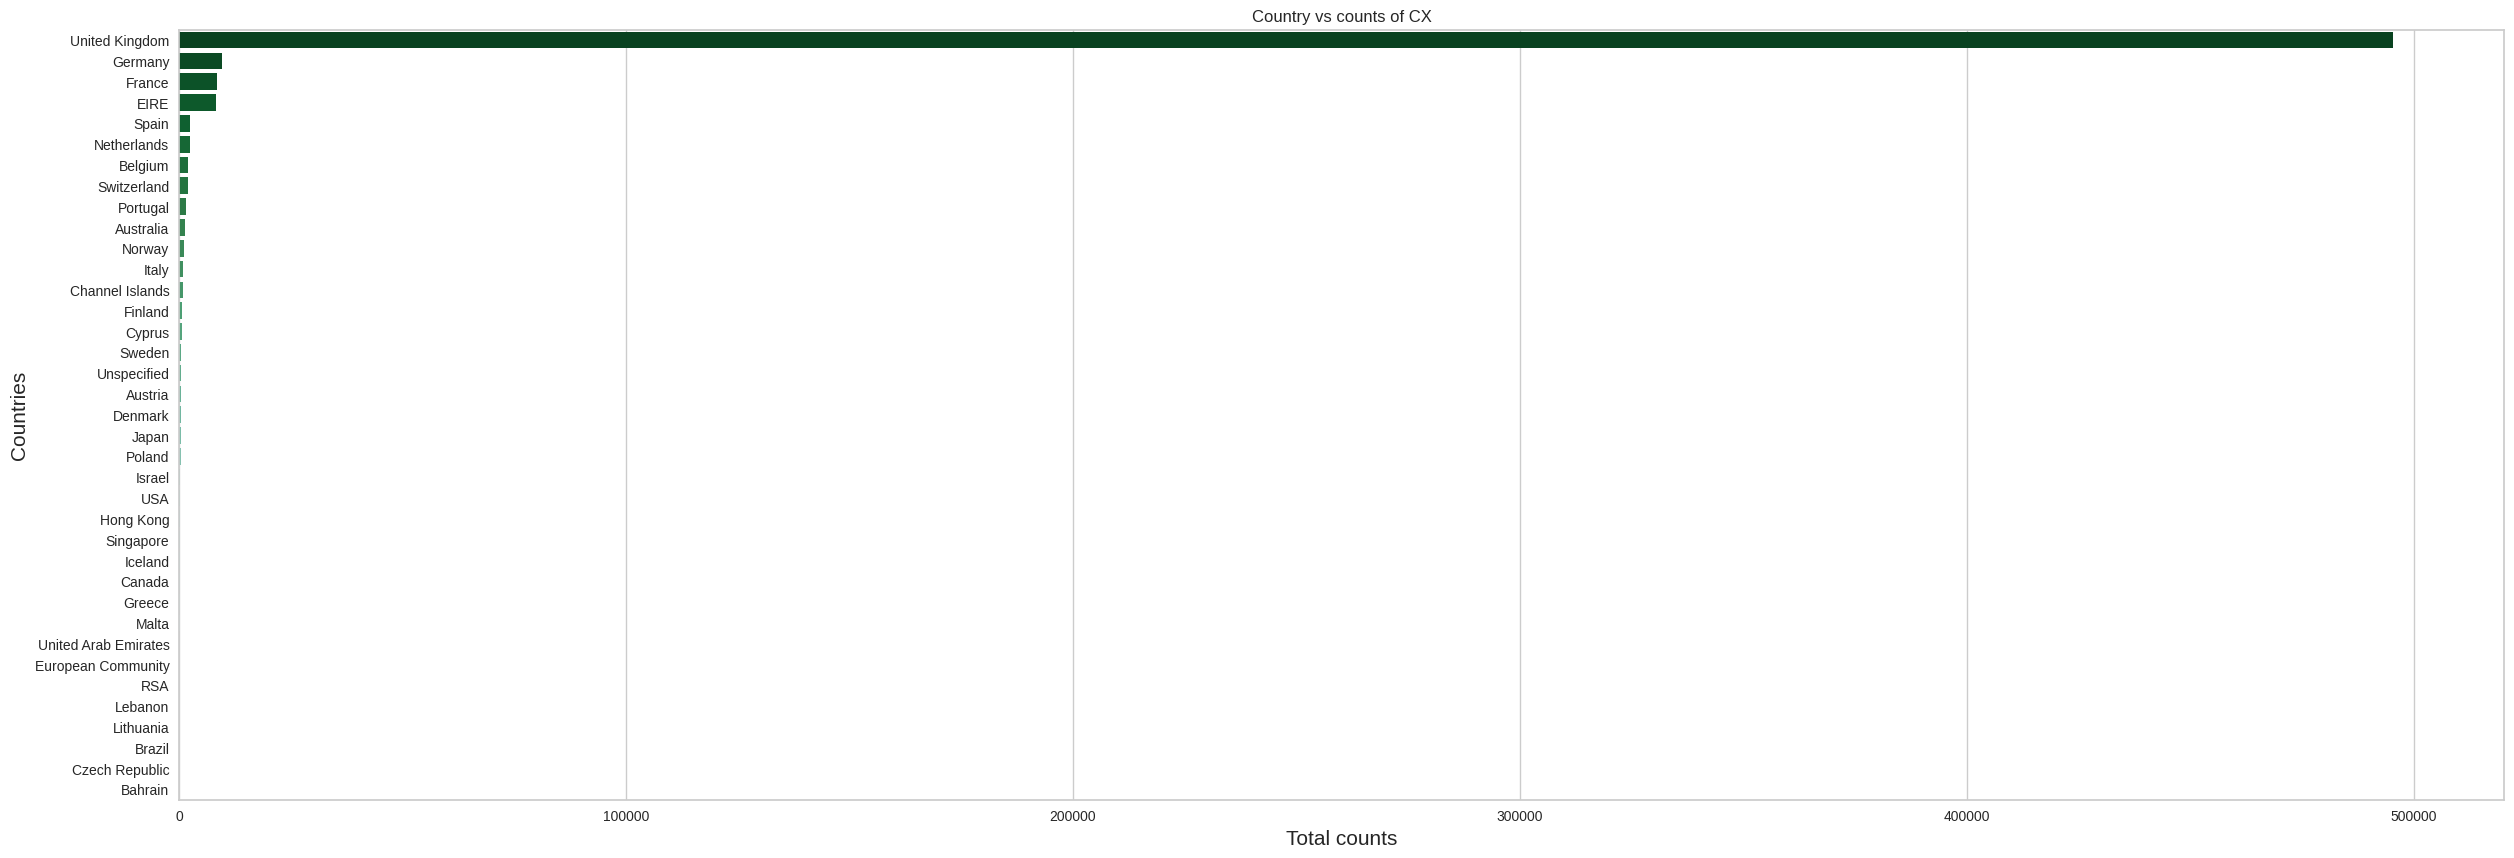

In [ ]:
plt.figure(figsize= (30,10))
sns.barplot(x = 'Country' , y = 'index' , data = top_countries[:37] , palette=("BuGn_r")) #Setting it will 15 only as there are may country with very small counts.
plt.xlabel('Total counts' , size = 15)
plt.ylabel('Countries' , size  = 15)
plt.title('Country vs counts of CX')

1. Why did you pick the specific chart?

*  Bar plot is a good and easy way to visualize here as we want to compare demand by country.




2. What is/are the insight(s) found from the chart?

*   UK have highest demand followed by germany and france




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Management is advised to evaluate advertising spending and ROI in the UK and Germany, considering the higher demand in the UK. They should also assess investments in countries like Czech Republic and Bahrain with low customer numbers, aiming for a balanced ROI-to-customer acquisition cost ratio to foster positive business growth.



Chart-3

**Monthly consumptions and top months**

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called df with a column 'InvoiceDate'
# and it contains the date and time in a format like "01/12/2010 08:26:00"
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M:%S')

# Extract the month from the 'InvoiceDate' column and create a new column 'Invoice_Month'
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B')

# Group the data by 'Invoice_Month' and count the frequency of invoices
monthly_frequency = df['Invoice_Month'].value_counts().reset_index()
monthly_frequency.columns = ['Invoice_Month', 'Monthly Frequency']

# Sort the data by month (assuming you want it in chronological order)

monthly_frequency.head(12)


,Invoice_Month,Monthly Frequency
0,November,84711
1,December,68006
2,October,60742
3,September,50226
4,July,39518
5,May,37030
6,June,36874
7,March,36748
8,August,35284
9,January,35147


<Axes: xlabel='Invoice_Month', ylabel='Monthly Frequency'>

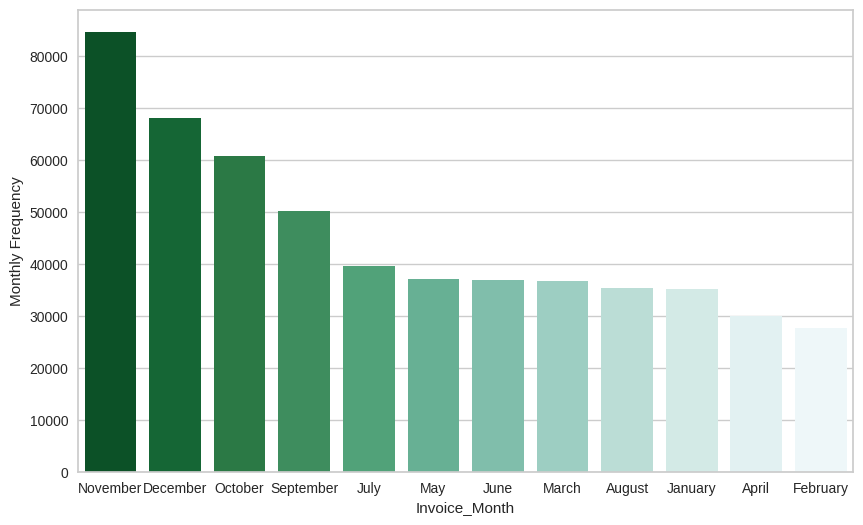

In [ ]:
plt.figure(figsize= (10,6))
 #Setting it will 15 only as there are may country with very small counts.
sns.barplot(x = 'Invoice_Month' , y = 'Monthly Frequency' , data = monthly_frequency[:12] , palette=("BuGn_r"))

1. Why did you pick the specific chart?

*   
I here want to compare demand by month, bar plot is best option for that. It compares month sales side by side.





2. What is/are the insight(s) found from the chart?

*   November have highest frequency of demand and february have least frequency




3. How likely are the insights gained to contribute positively to the business?

*   The management may want to allocate additional resources towards advertising and discount strategies during months such as February and April in order to stimulate increased sales. This strategic approach has the potential to foster a positive trajectory for business growth.


  Chart-4

**Top Hours**

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called df with a column 'InvoiceDate'
# and it contains the date and time in a format like "01/12/2010 08:26:00"
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M:%S')

# Extract the month from the 'InvoiceDate' column and create a new column 'Invoice_Month'
df['Invoice_Hour'] = df['InvoiceDate'].dt.strftime('%H')

# Group the data by 'Invoice_Month' and count the frequency of invoices
frequency = df['Invoice_Hour'].value_counts().reset_index()
frequency.columns = ['Invoice_Hour', 'Frequency']

# Sort the data by month (assuming you want it in chronological order)

frequency.head(116)




,Invoice_Hour,Frequency
0,12,78709
1,15,77519
2,13,72259
3,14,67471
4,11,57674
5,16,54516
6,10,49037
7,09,34332
8,17,28509
9,08,8909


Text(0.5, 1.0, 'Frequency by Hours')

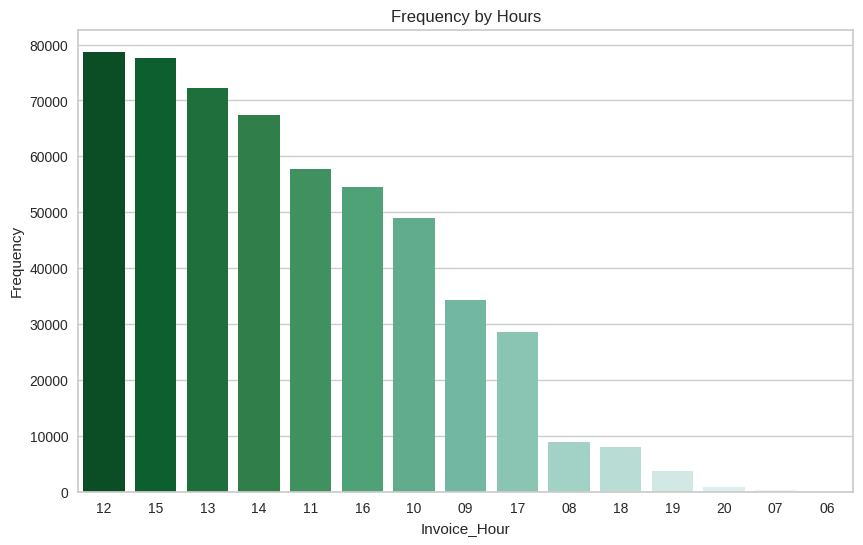

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'Invoice_Hour' , y = 'Frequency' , data =frequency[:] , palette=("BuGn_r"))
plt.title('Frequency by Hours')

1. Why did you pick the specific chart?

*   To compare demand of customers by hrs, bar plot is best option.




2. What is/are the insight(s) found from the chart?

*   12, 13 hrs have highest demand and 20,06,07 hrs less demand



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The management can explore of using more serve space in 12, 13 hrs, and lesser in off hrs like after 20 and before 9. If done, it can potentially lead to positive buisness growth.



Chart-5

**Top and bottom purchased product by product description.**

In [ ]:
pro_desc_df = pd.DataFrame(df['Description'].value_counts().sort_values(ascending = False).reset_index())
pro_desc_df.rename(columns = {'index' : 'Description' , 'Description': 'Frequency'}, inplace = True)

pro_desc_df

,Description,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
...,...,...
4218,dotcom sales,1
4219,LIGHT DECORATION BATTERY OPERATED,1
4220,ASSORTED TUTTI FRUTTI ROUND BOX,1
4221,RUBY GLASS CLUSTER NECKLACE,1


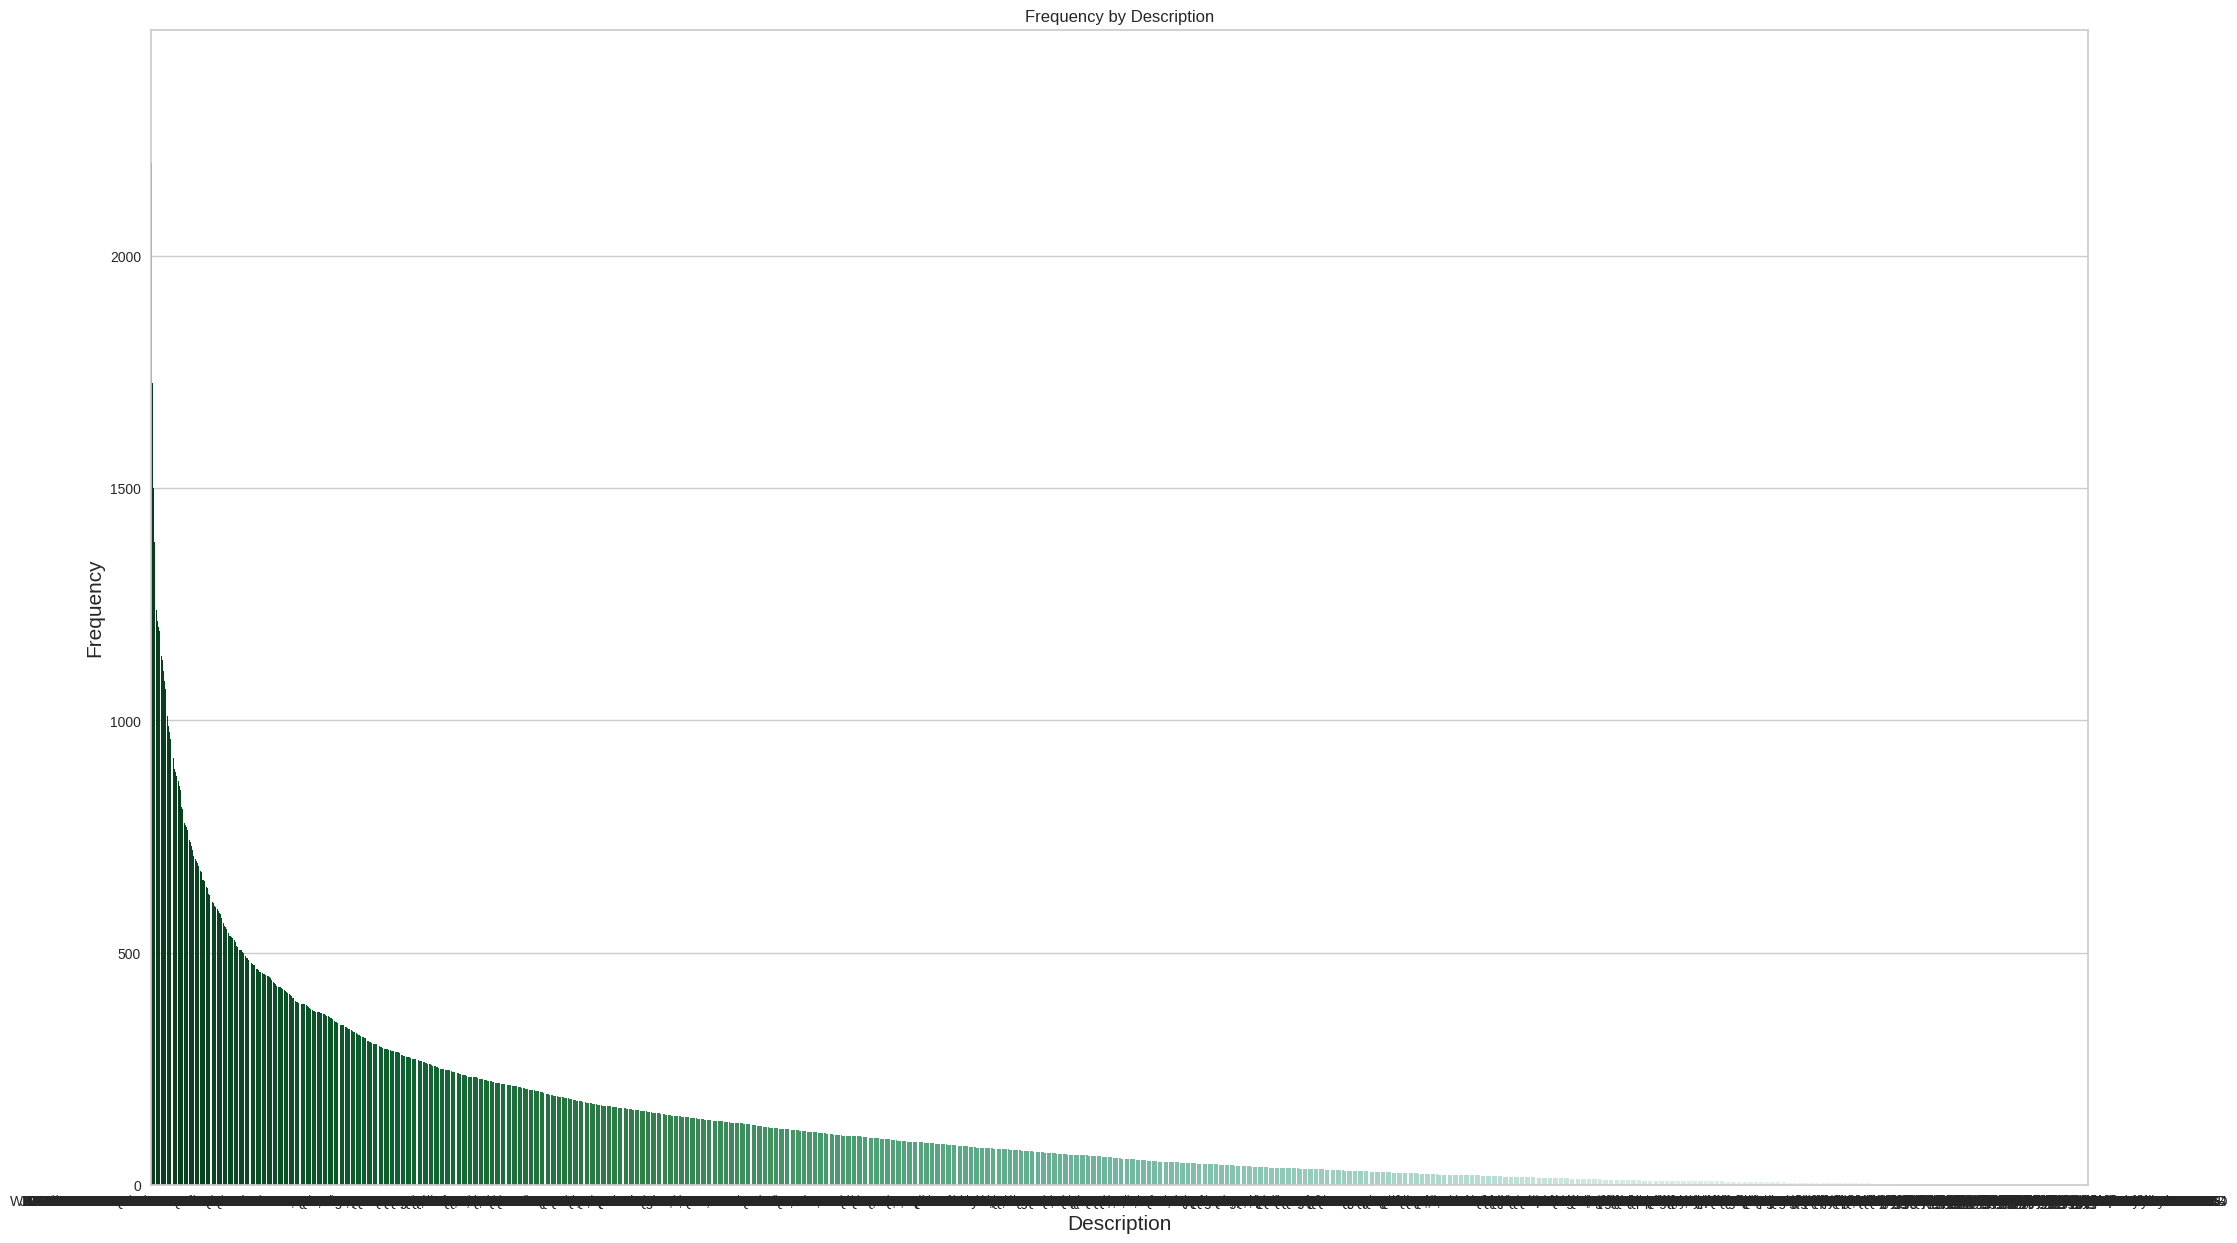

In [127]:
plt.figure(figsize=(25,15))

sns.barplot(x = 'Description' , y = 'Frequency' , data = pro_desc_df[:] ,  palette=("BuGn_r"))
plt.xlabel('Description' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.title('Frequency by Description')

plt.show()

1. Why did you pick the specific chart?

* Barplot is most suitable for comparision.



2. What is/are the insight(s) found from the chart?

* White hanging heart light have highest demand.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*
The management can push low sale items via ad if required.


Chart-6

**Top** **consumption** **by** **Days** **of** **week** **bold text**



In [ ]:
import pandas as pd

# Assuming you have a DataFrame called df with a column 'InvoiceDate'
# and it contains the date and time in a format like "01/12/2010 08:26:00"
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M:%S')

# Extract the month from the 'InvoiceDate' column and create a new column 'Invoice_Month'
df['Invoice_Day'] = df['InvoiceDate'].dt.strftime('%A')

# Group the data by 'Invoice_Month' and count the frequency of invoices
frequency = df['Invoice_Day'].value_counts().reset_index()
frequency.columns = ['Invoice_Day', 'Frequency']

# Sort the data by month (assuming you want it in chronological order)

frequency.head(116)




,Invoice_Day,Frequency
0,Thursday,103857
1,Tuesday,101808
2,Monday,95111
3,Wednesday,94565
4,Friday,82193
5,Sunday,64375


<Axes: xlabel='Invoice_Day', ylabel='Frequency'>

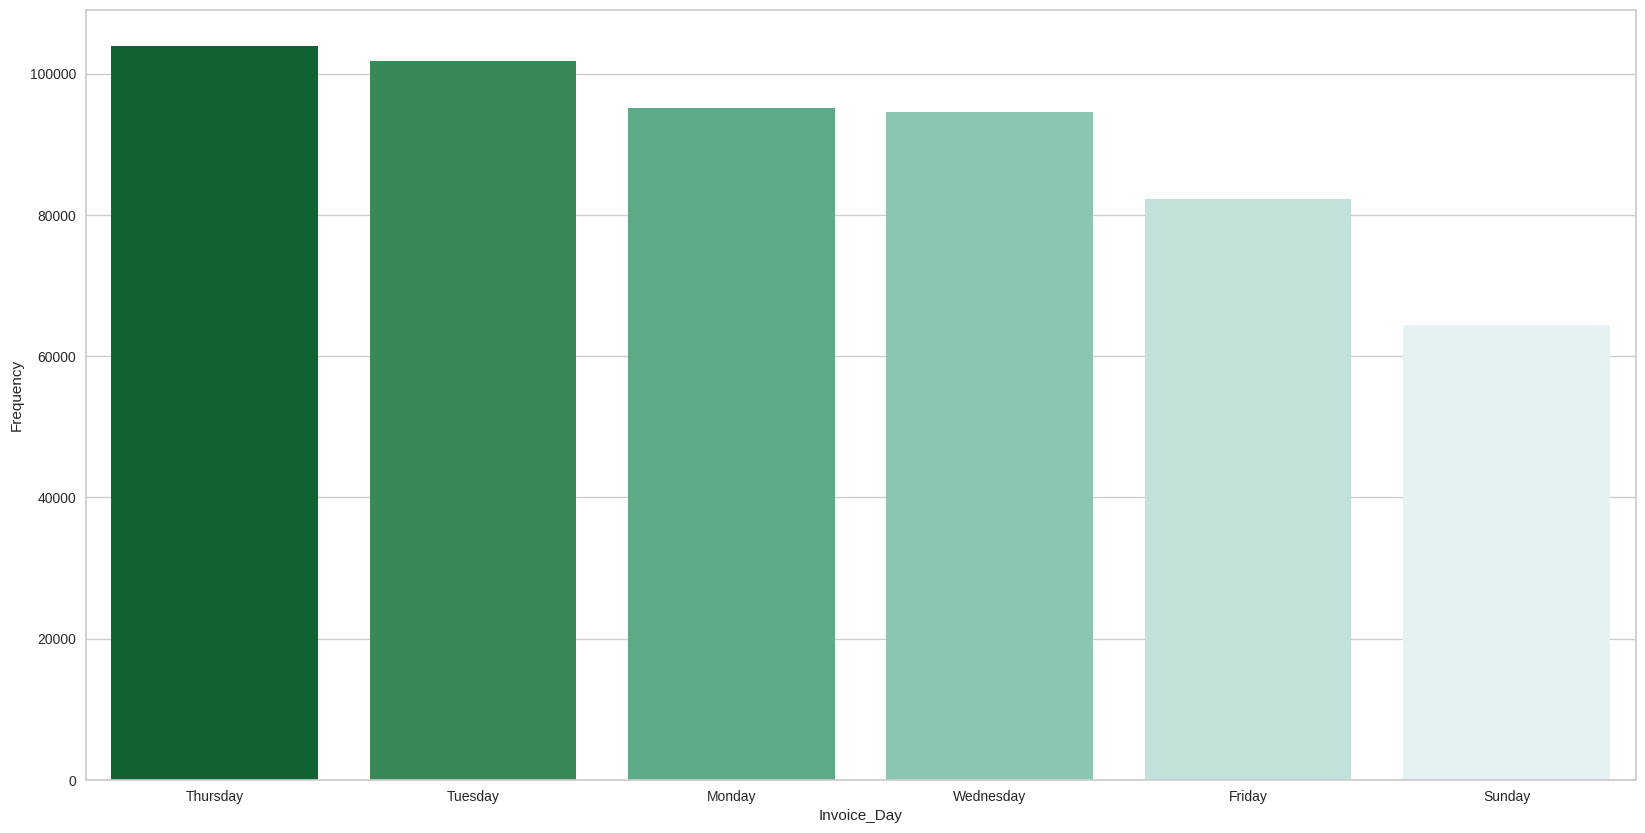

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Invoice_Day' , y = 'Frequency' , data =frequency[:] , palette=("BuGn_r"))


1. Why did you pick the specific chart?

* For comparision, bar plot is the best option


2. What is/are the insight(s) found from the chart?

* Thrusday have highest sales, friday and sunday have among lowest.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The management can invest more on discounts on sunday and friday.



Chart-7

Toatal Amount

<Axes: xlabel='Total_Amount', ylabel='Density'>

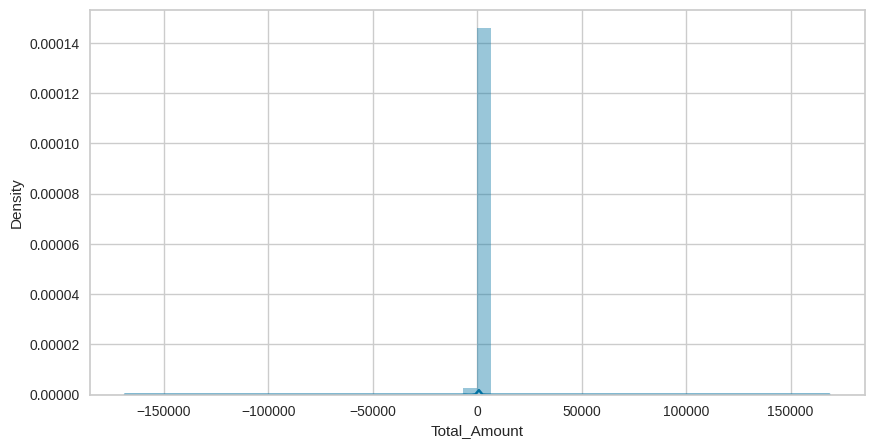

In [126]:
plt.figure(figsize = (10,5))
sns.distplot(df['Total_Amount'])

Text(0.5, 1.0, 'Distribution of Total Amount')

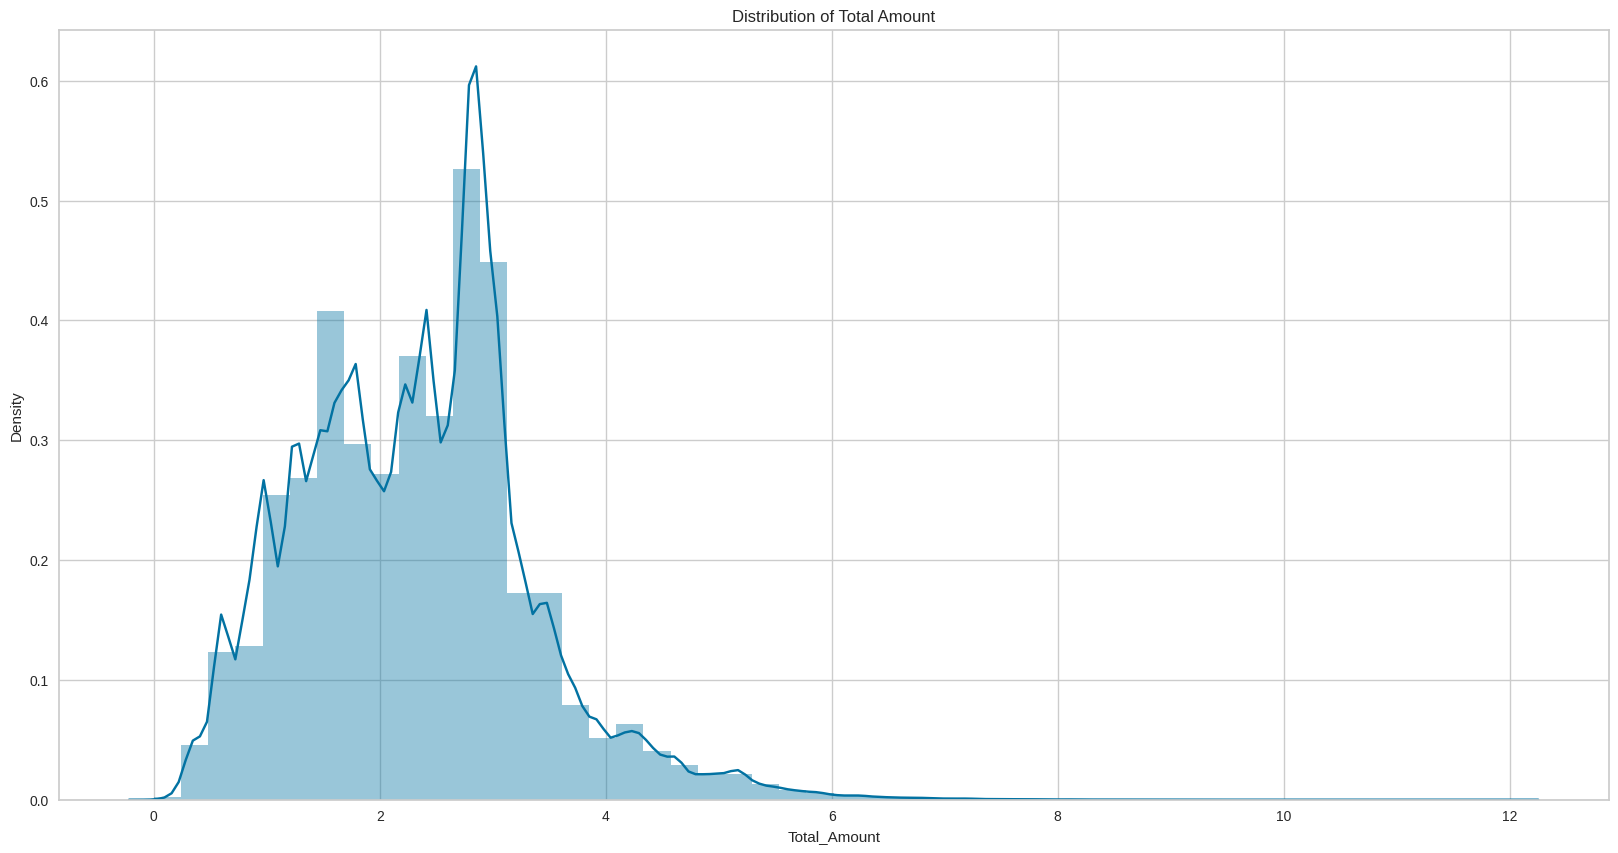

In [128]:
total_amount_df = df[df['Total_Amount']>0]

# Distribution of Total amounts
plt.figure(figsize = (20,10))
sns.distplot(np.log1p(total_amount_df['Total_Amount']))
plt.title('Distribution of Total Amount')

# Triveni workspace

#***dataset loading***

In [ ]:
#LOAD DATASET
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/drive/My Drive/Online Retail Customer Segmantation Dataset.xlsx')

Mounted at /content/drive


Missing Values

In [ ]:
df.isnull().sum()

NameError: ignored